In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from plotting_tools import * 

In [7]:
runtimes = pd.DataFrame({
    "rain": "no_rain",
    "decay": "no_decay",
    "memilio_sim": "pop8",
    "Reading": 3+28/60,
    "Calculate hydraulics": 13,
    "Calculate substances": 2+28/60,
    "Writing": 10/60,
}, index=[0])

runtimes2 = pd.DataFrame({
    "rain": "rain",
    "decay": "decay",
    "memilio_sim": "pop8",
    "Reading": 3+12/60,
    "Calculate hydraulics": 12,
    "Calculate substances": 5+24/60,
    "Writing": 8/60,
}, index=[1])

runtimes3 = pd.DataFrame({
    "rain": "rain",
    "decay": "decay",
    "memilio_sim": "pop8_local",
    "Reading": 7+21/60,
    "Calculate hydraulics": 12,
    "Calculate substances": 5+32/60,
    "Writing": 8/60,
}, index=[2])

runtimes4 = pd.DataFrame({
    "rain": "rain",
    "decay": "no_decay",
    "memilio_sim": "pop8",
    "Reading": 3+12/60,
    "Calculate hydraulics": 11,
    "Calculate substances": 3+43/60,
    "Writing": 8/60,
}, index=[3])


In [8]:
runtimes_long = pd.concat([runtimes, runtimes2, runtimes3, runtimes4], axis=0).melt(id_vars=["rain", "decay", "memilio_sim"])

In [9]:
runtimes_long.head()

,rain,decay,memilio_sim,variable,value
0,no_rain,no_decay,pop8,Reading,3.466667
1,rain,decay,pop8,Reading,3.200000
2,rain,decay,pop8_local,Reading,7.350000
3,rain,no_decay,pop8,Reading,3.200000
4,no_rain,no_decay,pop8,Calculate hydraulics,13.000000


In [10]:
runtimes_sub = runtimes_long.loc[(runtimes_long.memilio_sim=="pop8")&(runtimes_long.decay=="no_decay")]

In [11]:
runtimes_sub.variable = runtimes_sub.variable.apply(lambda x: x.replace(" ", "\n"))
runtimes_sub.rain = runtimes_sub.rain.apply(lambda x: x.replace("_", " "))
runtimes_sub.rain = runtimes_sub.rain.apply(lambda x: x.replace("rain", "precipitation"))

/tmp/ipykernel_42074/3459148759.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtimes_sub.variable = runtimes_sub.variable.apply(lambda x: x.replace(" ", "\n"))
/tmp/ipykernel_42074/3459148759.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  runtimes_sub.rain = runtimes_sub.rain.apply(lambda x: x.replace("_", " "))
/tmp/ipykernel_42074/3459148759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

/tmp/ipykernel_42074/3831672833.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


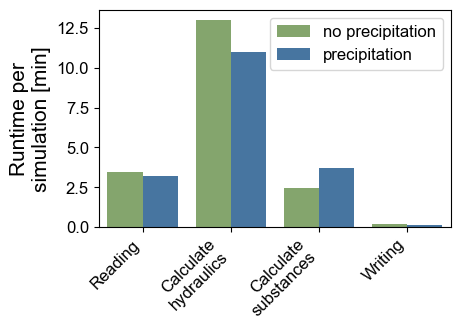

In [16]:
fig, ax = plt.subplots(figsize=(6*cm, 4.5*cm))

barplot = sns.barplot(
    data=runtimes_sub,
    x="variable",
    y="value",
    hue="rain",
    palette={"no precipitation": green, "precipitation": blue},
    ax=ax,
)
ax.set_ylabel("Runtime per\nsimulation [min]")
ax.set_xlabel("")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
ax.legend(title=None)

plt.tight_layout()
plt.savefig(os.path.join("..", "plots", "pop8", "runtime_visualization.png"), bbox_inches="tight", dpi=300)